In [1]:
import tensorflow as tf 
import cv2 
import os
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [2]:
img_array = cv2.imread("C:\\Users\\achal\\Downloads\\archive\\train\\surprise\\Training_9839279.jpg")

In [3]:
img_array.shape


(48, 48, 3)

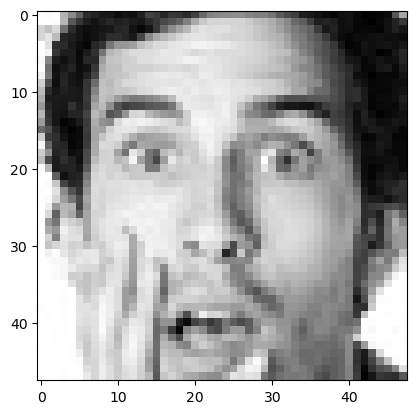

In [4]:
plt.imshow(img_array)

In [5]:
Datadirectory ="C:\\Users\\achal\\practice\\training"
Classes = ["0","1","2","3","4","5","6"]

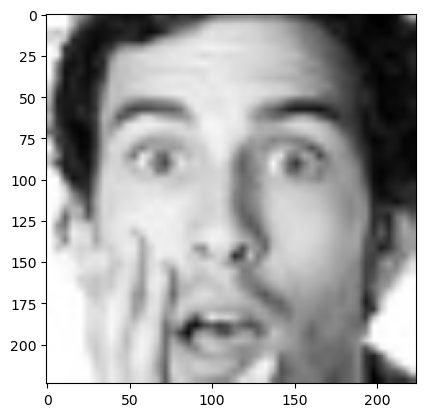

In [6]:
img_size = 224 
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

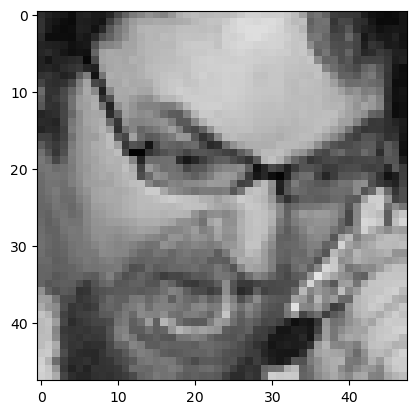

In [7]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    class_num = Classes.index(category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

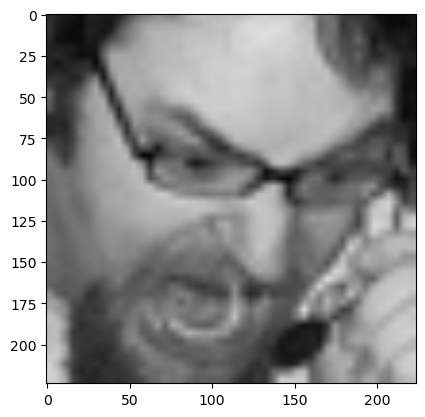

In [8]:
img_size=224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()


In [9]:
new_array.shape

(224, 224, 3)

In [10]:
training_Data = []
def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (img_size, img_size))
            training_Data.append([new_array, class_num])
        except Exception as e:
            pass

In [26]:
create_training_Data()

In [27]:
print(len(training_Data))

13296


In [28]:
temp=np.array(training_Data)

C:\Users\achal\AppData\Local\Temp\ipykernel_16728\3867436754.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  temp=np.array(training_Data)


In [29]:
temp.shape

(13296, 2)

temp.shape

In [30]:
import random
random.shuffle(training_Data)

In [31]:
X = []
y = []
for features, label in training_Data:
    X.append(features)
    y.append(label)
X = np.array(X).reshape(-1, img_size, img_size, 3) 
# 3 is the channel for RGB

In [32]:
X.shape
X =X/255.0


In [33]:
y[0]

6

In [34]:
Y=np.array(y)

In [35]:
Y.shape

(13296,)

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [37]:
model = tf.keras.applications.MobileNetV2()

In [38]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [39]:
base_input = model.layers[0].input

In [40]:
base_output = model.layers[-2].output

In [41]:
base_output


<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [42]:
final_output = layers.Dense(128)(base_output) 
final_output = layers.Activation('relu')(final_output) 
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7, activation='softmax')(final_output)

In [43]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [44]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [45]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [ ]:
new_model.fit(X, Y, epochs = 25)

Epoch 1/25
416/416 [==============================] - 392s 924ms/step - loss: 0.0055 - accuracy: 0.9977
Epoch 2/25
365/416 [=========================>....] - ETA: 48s - loss: 1.6708e-08 - accuracy: 1.0000

In [46]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [123]:
new_model.save('Final_model_95p07.h5')

In [124]:
new_model=tf.keras.models.load_model('Final_model_95p07.h5')

In [125]:
new_model.evaluate

<bound method Model.evaluate of <keras.engine.functional.Functional object at 0x00000115B9E1CE50>>

In [126]:
frame=cv2.imread("C:\\Users\\achal\\Downloads\\happyboy.jpeg")

In [127]:
frame.shape

(140, 140, 3)

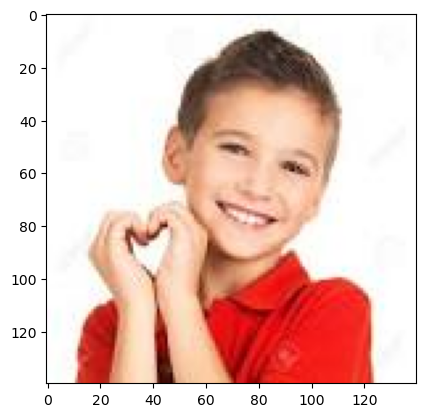

In [128]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [130]:
faceCascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [131]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [133]:
gray.shape

(140, 140)

In [135]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

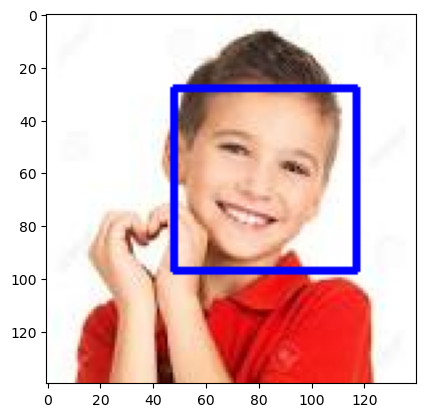

In [137]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [139]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image,axis=0) ## need fourth dimension
final_image = final_image/255.0

In [141]:
Predictions = new_model.predict(final_image)


1/1 [==============================] - 0s 35ms/step


In [144]:
Predictions[0]

array([0.11587863, 0.1075682 , 0.10681149, 0.05981279, 0.0153062 ,
       0.37744644, 0.21717623], dtype=float32)

In [148]:
np.argmax(Predictions)

5